<a href="https://colab.research.google.com/github/raj-027/R-Programs/blob/main/R_assignment_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘sparsevctrs’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’




In [5]:
install.packages("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [6]:
# Load required packages
library(dplyr)
library(caret)
library(ggplot2)
library(corrplot)
library(knitr)

corrplot 0.95 loaded



In [24]:
auto_mpg <- read.csv(
  "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data",
  sep = "",
  header = FALSE,
  na.strings = "?"
)

In [25]:
# Assign column names based on the dataset documentation
colnames(auto_mpg) <- c("mpg", "cylinders", "displacement", "horsepower",
                        "weight", "acceleration", "model_year", "origin",
                        "car_name")

In [26]:

# Drop 'car_name' for modeling
auto_mpg <- auto_mpg %>% select(-car_name)


In [27]:
# Convert horsepower to numeric
auto_mpg$horsepower <- as.numeric(auto_mpg$horsepower)


In [29]:
# Remove rows with missing values
auto_mpg <- na.omit(auto_mpg)


In [32]:
head(auto_mpg)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,18,8,307,130,3504,12.0,70,1
2,15,8,350,165,3693,11.5,70,1
3,18,8,318,150,3436,11.0,70,1
4,16,8,304,150,3433,12.0,70,1
5,17,8,302,140,3449,10.5,70,1
6,15,8,429,198,4341,10.0,70,1


In [31]:
summary(auto_mpg)

      mpg          cylinders      displacement     horsepower        weight    
 Min.   : 9.00   Min.   :3.000   Min.   : 68.0   Min.   : 46.0   Min.   :1613  
 1st Qu.:17.00   1st Qu.:4.000   1st Qu.:105.0   1st Qu.: 75.0   1st Qu.:2225  
 Median :22.75   Median :4.000   Median :151.0   Median : 93.5   Median :2804  
 Mean   :23.45   Mean   :5.472   Mean   :194.4   Mean   :104.5   Mean   :2978  
 3rd Qu.:29.00   3rd Qu.:8.000   3rd Qu.:275.8   3rd Qu.:126.0   3rd Qu.:3615  
 Max.   :46.60   Max.   :8.000   Max.   :455.0   Max.   :230.0   Max.   :5140  
  acceleration     model_year        origin     
 Min.   : 8.00   Min.   :70.00   Min.   :1.000  
 1st Qu.:13.78   1st Qu.:73.00   1st Qu.:1.000  
 Median :15.50   Median :76.00   Median :1.000  
 Mean   :15.54   Mean   :75.98   Mean   :1.577  
 3rd Qu.:17.02   3rd Qu.:79.00   3rd Qu.:2.000  
 Max.   :24.80   Max.   :82.00   Max.   :3.000  

In [33]:
# Check correlations among numeric predictors
cor_data <- cor(auto_mpg[, c("mpg", "cylinders", "displacement",
                             "horsepower", "weight", "acceleration",
                             "model_year", "origin")])


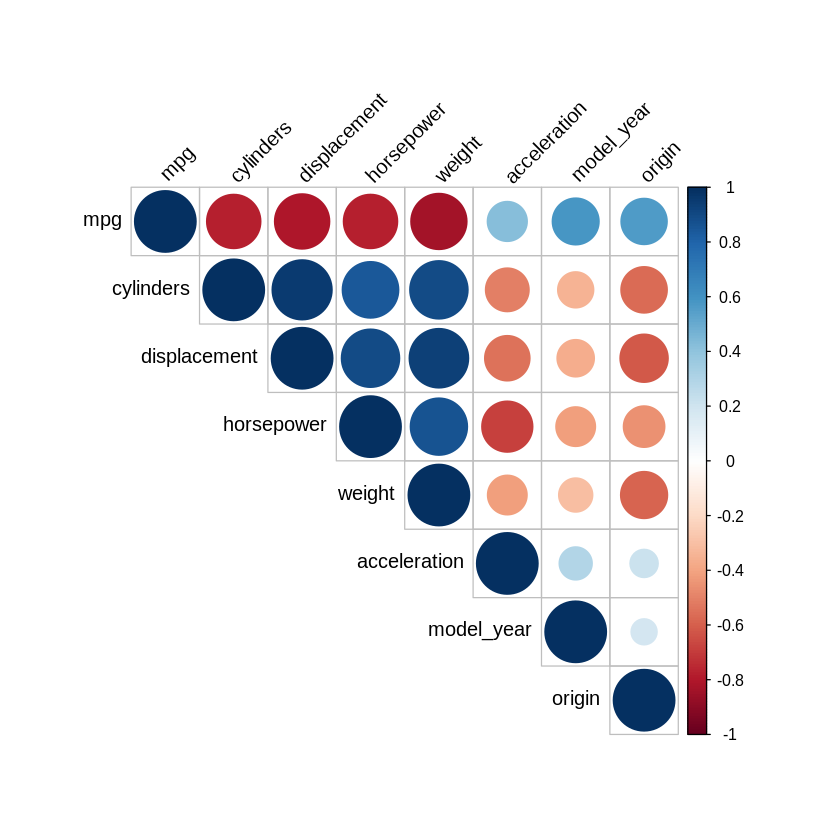

In [35]:
# Plot correlation matrix
corrplot(cor_data, method = "circle", type = "upper", tl.col = "black", tl.srt = 45)


In [37]:
## 4. Train-Test Split

set.seed(999)  # For reproducibility

# Create an 80-20 train-test split
train_index <- createDataPartition(auto_mpg$mpg, p = 0.8, list = FALSE)
train_data <- auto_mpg[train_index, ]
test_data  <- auto_mpg[-train_index, ]

# Check the dimensions
cat("Training rows:", nrow(train_data), "Testing rows:", nrow(test_data))


Training rows: 315 Testing rows: 77

In [38]:
# Fit the model
model <- lm(mpg ~ ., data = train_data)

# Output the summary of the fitted model
# summary(model)

# Extract the summary of the model
model_summary <- summary(model)

# Convert coefficients to a nicely formatted table
kable(model_summary$coefficients,
      caption = "Regression Model Coefficients",
      digits = 4, align = "c")




Table: Regression Model Coefficients

|             | Estimate | Std. Error | t value | Pr(>&#124;t&#124;) |
|:------------|:--------:|:----------:|:-------:|:------------------:|
|(Intercept)  | -20.6251 |   5.4035   | -3.8170 |       0.0002       |
|cylinders    | -0.3796  |   0.3634   | -1.0443 |       0.2972       |
|displacement |  0.0207  |   0.0085   | 2.4438  |       0.0151       |
|horsepower   | -0.0187  |   0.0156   | -1.1965 |       0.2324       |
|weight       | -0.0066  |   0.0008   | -8.6899 |       0.0000       |
|acceleration |  0.0446  |   0.1121   | 0.3975  |       0.6913       |
|model_year   |  0.7974  |   0.0591   | 13.4849 |       0.0000       |
|origin       |  1.5914  |   0.3218   | 4.9449  |       0.0000       |

In [40]:
#Model evaluation
predictions <- predict(model, newdata = test_data)

# Calculate RMSE
rmse <- sqrt(mean((test_data$mpg - predictions)^2))
cat("Root Mean Squared Error (RMSE):", rmse, "\n")


Root Mean Squared Error (RMSE): 2.923895 


In [42]:
print(predictions)

        5         7        13        20        23        34        37        51 
15.070002 10.675318 14.804416 26.799877 22.330253 21.418956 17.716681 24.976777 
       52        57        63        65        69        70        74        77 
25.154321 24.641100 11.810074 12.413449 10.558588 10.768831 12.826381 20.141229 
       83        93       102       104       108       114       119       120 
24.811240 12.215928 20.755578  9.237273 22.079540 22.405386 26.687604 23.481285 
      126       136       138       140       161       162       164       168 
20.268079 17.265781 10.990777 10.655069 16.353328 16.794104 17.225921 29.417502 
      173       179       185       194       202       204       205       214 
27.435135 22.914121 24.906807 22.808953 19.059191 30.813084 31.299753 16.819083 
      218       231       232       233       236       245       254       255 
28.077490 16.396337 16.035421 15.825278 30.489705 32.051065 23.224751 24.559018 
      256       262       26

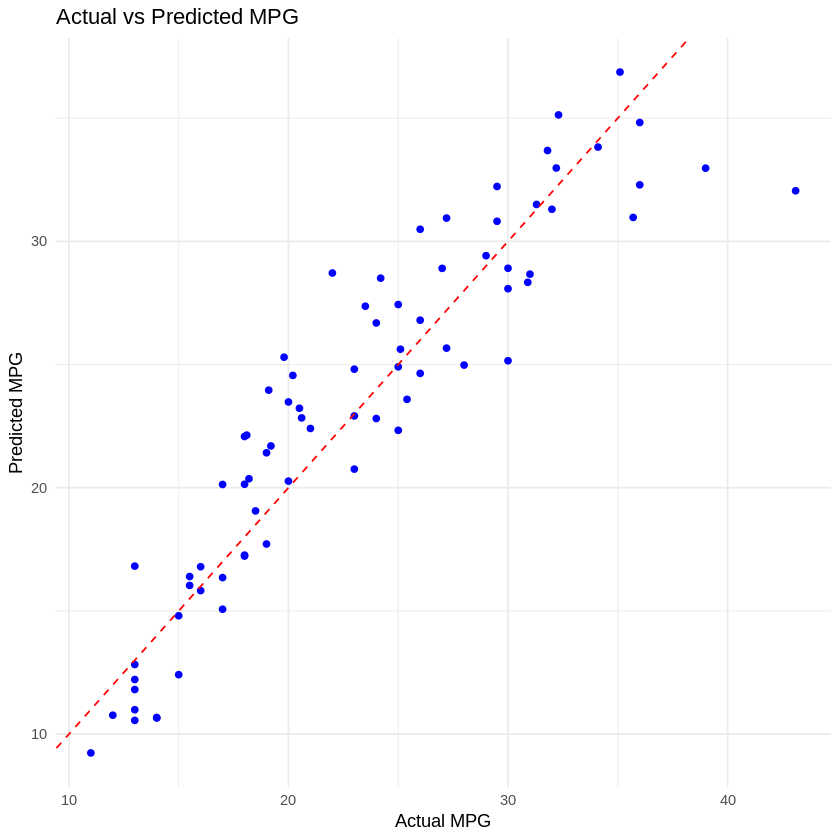

In [41]:
results_df <- data.frame(
  Actual = test_data$mpg,
  Predicted = predictions
)

ggplot(results_df, aes(x = Actual, y = Predicted)) +
  geom_point(color = "blue") +
  geom_abline(slope = 1, intercept = 0, color = "red", linetype = "dashed") +
  labs(
    title = "Actual vs Predicted MPG",
    x = "Actual MPG",
    y = "Predicted MPG"
  ) +
  theme_minimal()